In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style='darkgrid')
%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_excel('income.xlsx')
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [24]:
df.drop(columns = ['capitalgain','capitalloss'],inplace = True)

In [25]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,35,United-States,"less than or equal to 50,000"


In [28]:
columns = ['JobType','EdType','maritalstatus','occupation','relationship','race','gender',
          'nativecountry','SalStat']

for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    

In [29]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
0,45,4,11,0,1,1,4,0,28,38,1
1,24,1,11,4,2,3,4,1,40,38,1
2,44,4,15,2,10,0,4,1,40,38,0
3,27,4,6,4,3,2,4,1,40,25,1
4,20,4,15,4,12,1,4,1,35,38,1


In [30]:
df.SalStat.value_counts()

1    24283
0     7695
Name: SalStat, dtype: int64

In [31]:
# Less than or equal to 50k,0 means less than 50k
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat
age,1.000000,0.002941,-0.009375,-0.265736,-0.020929,-0.264718,0.026615,0.089035,0.068299,-0.000323,-0.233601
JobType,0.002941,1.000000,0.024515,-0.065426,0.255280,-0.090504,0.051732,0.094961,0.139431,-0.003658,-0.051166
EdType,-0.009375,0.024515,1.000000,-0.038663,-0.021248,-0.011239,0.014345,-0.027212,0.056381,0.077016,-0.080056
maritalstatus,-0.265736,-0.065426,-0.038663,1.000000,-0.010070,0.185034,-0.068888,-0.129334,-0.193249,-0.021846,0.198467
occupation,-0.020929,0.255280,-0.021248,-0.010070,1.000000,-0.076039,0.008921,0.080062,0.080514,-0.004583,-0.076930
relationship,-0.264718,-0.090504,-0.011239,0.185034,-0.076039,1.000000,-0.117787,-0.581323,-0.248907,-0.010668,0.250866
race,0.026615,0.051732,0.014345,-0.068888,0.008921,-0.117787,1.000000,0.090093,0.045787,0.121527,-0.072713
gender,0.089035,0.094961,-0.027212,-0.129334,0.080062,-0.581323,0.090093,1.000000,0.229645,0.001556,-0.216070
hoursperweek,0.068299,0.139431,0.056381,-0.193249,0.080514,-0.248907,0.045787,0.229645,1.000000,0.006238,-0.230448
nativecountry,-0.000323,-0.003658,0.077016,-0.021846,-0.004583,-0.010668,0.121527,0.001556,0.006238,1.000000,-0.023179


In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['SalStat']), df['SalStat'], test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25582, 10), (25582,), (6396, 10), (6396,))

In [33]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []

In [34]:
algo = "Logistic Regression"
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Logistic Regression
[[ 251 1306]
 [ 274 4565]] 


Accuracy: 75.29706066291432
Recall: 94.33767307294896
Precision: 77.75506727985011
F score: 85.24743230625585


In [35]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

K Nearest Neighbour
[[ 814  743]
 [ 632 4207]] 


Accuracy: 78.50218886804252
Recall: 86.93945029964868
Precision: 84.98989898989899
F score: 85.95362141178875


In [36]:
algo = "Decision Tree"
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Decision Tree
[[ 903  654]
 [ 770 4069]] 


Accuracy: 77.73608505315822
Recall: 84.08762140938211
Precision: 86.15286893923354
F score: 85.10771805061702


In [37]:
algo = "Naive Bayes"
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Naive Bayes
[[1061  496]
 [1065 3774]] 


Accuracy: 75.59412132582864
Recall: 77.99132052076875
Precision: 88.384074941452
F score: 82.86310242617192


In [38]:
algo = "Random Forest"
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Random Forest
[[ 880  677]
 [ 502 4337]] 


Accuracy: 81.56660412757974
Recall: 89.62595577598678
Precision: 86.49780614280016
F score: 88.03410128894753


In [39]:
for i in range(5):
    print(algos[i], ':     ', accuracy[i],',  ', recall[i],',  ', precision[i],',  ', f1Score[i])

Logistic Regression :      75.29706066291432 ,   94.33767307294896 ,   77.75506727985011 ,   85.24743230625585
K Nearest Neighbour :      78.50218886804252 ,   86.93945029964868 ,   84.98989898989899 ,   85.95362141178875
Decision Tree :      77.73608505315822 ,   84.08762140938211 ,   86.15286893923354 ,   85.10771805061702
Naive Bayes :      75.59412132582864 ,   77.99132052076875 ,   88.384074941452 ,   82.86310242617192
Random Forest :      81.56660412757974 ,   89.62595577598678 ,   86.49780614280016 ,   88.03410128894753


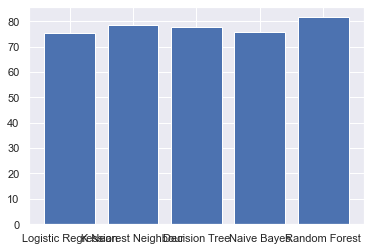

In [40]:
plt.bar(algos, accuracy)
plt.show()